   caseno  sepal_length  sepal_width  petal_length  petal_width species
0       1           5.1          3.5           1.4          0.2  setosa
1       2           4.9          3.0           1.4          0.2  setosa
2       3           4.7          3.2           1.3          0.2  setosa
3       4           4.6          3.1           1.5          0.2  setosa
4       5           5.0          3.6           1.4          0.2  setosa


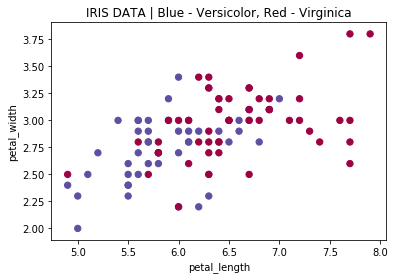

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('C:/Users/Hojin/Desktop/PycharmProjects/')
iris=pd.read_csv('iris.csv')

print(iris.head())

iris.loc[iris['species']=='virginica','species']=0
iris.loc[iris['species']=='versicolor','species']=1
iris.loc[iris['species']=='setosa','species']=2
iris=iris[iris['species']!=2]

X=iris[['sepal_length', 'sepal_width']].values.T
Y=iris[['species']].values.T
Y=Y.astype('uint8')

plt.scatter(X[0,:], X[1,:], c=Y[0,:],s=40,cmap=plt.cm.Spectral);
plt.title("IRIS DATA | Blue - Versicolor, Red - Virginica")
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

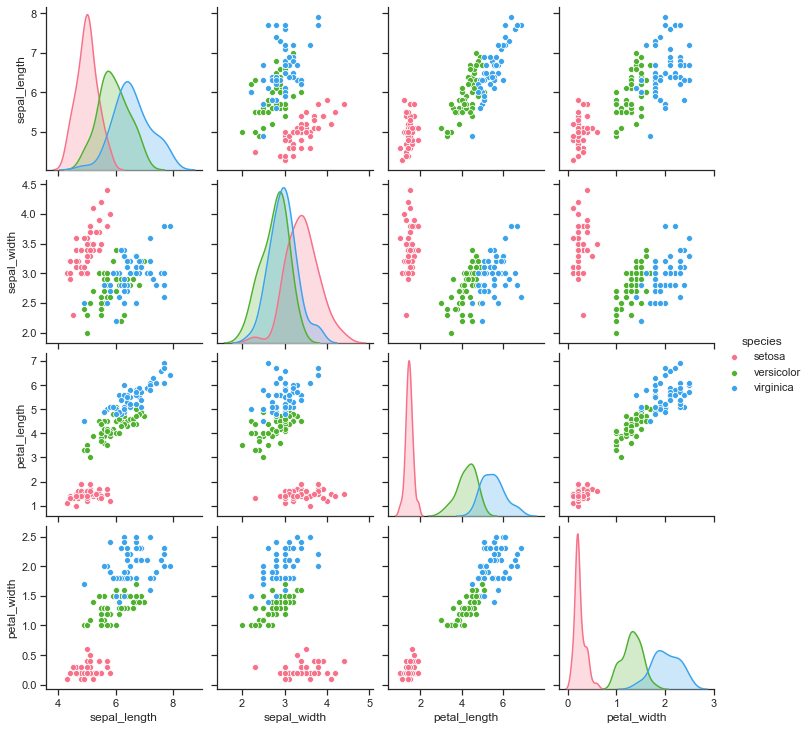

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="ticks", color_codes=True)
iris=sns.load_dataset("iris")
g=sns.pairplot(iris, hue="species", palette="husl")

In [12]:
iris.info()
iris['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

encoder=LabelEncoder()
y1=encoder.fit_transform(y)
Y=pd.get_dummies(y1).values

print(Y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model=Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [16]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 1.2422 - accuracy: 0.2833 - val_loss: 1.1527 - val_accuracy: 0.2000
Epoch 2/100
120/120 [==============================] - 0s 208us/step - loss: 1.0443 - accuracy: 0.3667 - val_loss: 1.0148 - val_accuracy: 0.2000
Epoch 3/100
120/120 [==============================] - 0s 183us/step - loss: 0.8966 - accuracy: 0.5500 - val_loss: 0.8940 - val_accuracy: 0.5667
Epoch 4/100
120/120 [==============================] - 0s 167us/step - loss: 0.8106 - accuracy: 0.6917 - val_loss: 0.8068 - val_accuracy: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 150us/step - loss: 0.7460 - accuracy: 0.6917 - val_loss: 0.7353 - val_accuracy: 0.5667
Epoch 6/100
120/120 [==============================] - 0s 158us/step - loss: 0.6866 - accuracy: 0.6917 - val_loss: 0.6711 - val_accuracy: 0.5667
Epoch 7/100
120/120 [==============================] - 0s 192us/step - loss: 0.6361 - a

Epoch 57/100
120/120 [==============================] - 0s 158us/step - loss: 0.1038 - accuracy: 0.9750 - val_loss: 0.1425 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 142us/step - loss: 0.1024 - accuracy: 0.9750 - val_loss: 0.1335 - val_accuracy: 0.9667
Epoch 59/100
120/120 [==============================] - 0s 192us/step - loss: 0.0996 - accuracy: 0.9750 - val_loss: 0.1240 - val_accuracy: 1.0000
Epoch 60/100
120/120 [==============================] - 0s 192us/step - loss: 0.1027 - accuracy: 0.9750 - val_loss: 0.1228 - val_accuracy: 1.0000
Epoch 61/100
120/120 [==============================] - 0s 158us/step - loss: 0.1002 - accuracy: 0.9750 - val_loss: 0.1465 - val_accuracy: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 200us/step - loss: 0.0988 - accuracy: 0.9750 - val_loss: 0.1265 - val_accuracy: 0.9667
Epoch 63/100
120/120 [==============================] - 0s 225us/step - loss: 0.0945 - accuracy: 0.9750 - val_loss: 0.1149 -

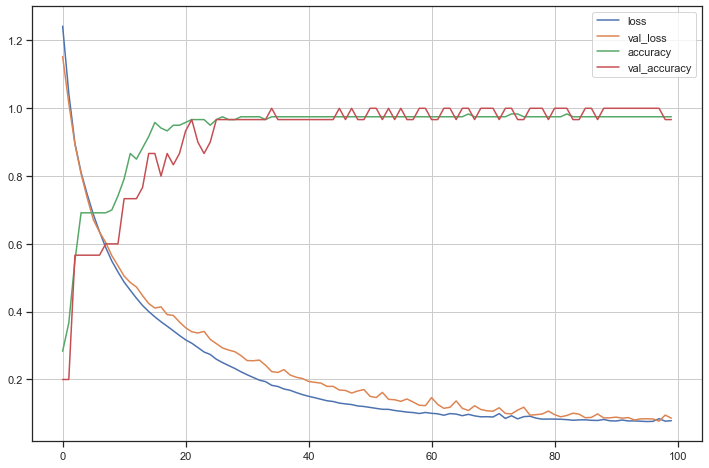

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()